In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [2]:
rows_count, col_count = 5000, 2
X, y = make_regression(n_samples=rows_count, n_features=col_count, noise=6, random_state=42, bias=-10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [3]:
from utils.linear_regression import mse, forward, train_linear_regressor

losses, parameters, gradients, current_parameters = train_linear_regressor(X_train, y_train)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 1334.758079
Epoch 1, loss: 892.424199
Epoch 2, loss: 613.165379
Epoch 3, loss: 436.852034
Epoch 4, loss: 325.528956
Epoch 5, loss: 255.236763
Epoch 6, loss: 210.850254
Epoch 7, loss: 182.820645
Epoch 8, loss: 165.119337
Epoch 9, loss: 153.939999
Epoch 10, loss: 146.879273
Epoch 11, loss: 142.419576
Epoch 12, loss: 139.602593
Epoch 13, loss: 137.823143
Epoch 14, loss: 136.699029
Epoch 15, loss: 135.988865
Epoch 16, loss: 135.540192
Epoch 17, loss: 135.256711
Epoch 18, loss: 135.077592
Epoch 19, loss: 134.964408
Epoch 20, loss: 134.892884
Epoch 21, loss: 134.847684
Epoch 22, loss: 134.819118
Epoch 23, loss: 134.801063
Epoch 24, loss: 134.789651
Epoch 25, loss: 134.782438
Epoch 26, loss: 134.777878
Epoch 27, loss: 134.774995
Epoch 28, loss: 134.773173
Epoch 29, loss: 134.772021
Epoch 30, loss: 134.771292


In [4]:
y_pred = forward(X_test, current_parameters)
y_pred = y_pred.flatten()

print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'Parameters: {current_parameters[0]}')

Mean Squared Error: 134.64761202057812
Parameters: [10.17855145 32.60577713]


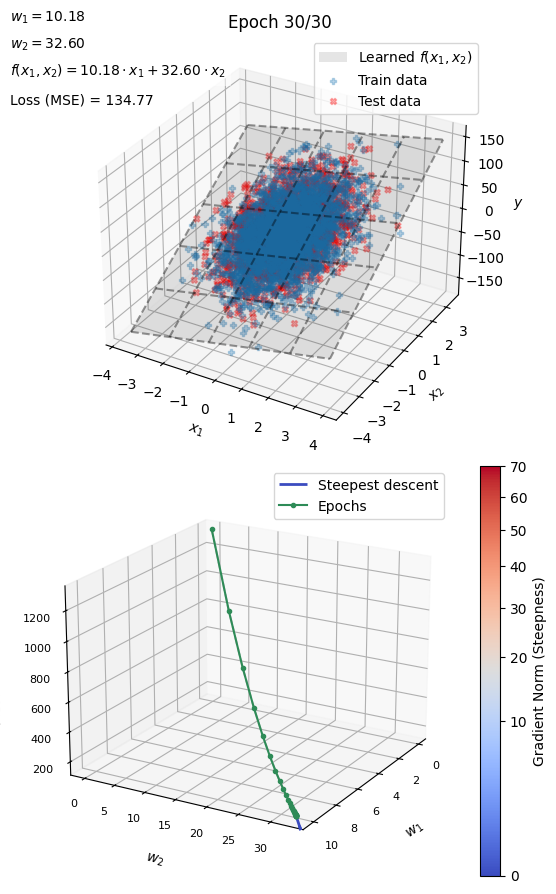

In [5]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_3D_loss
from utils.linear_regression import plot_3D_plane_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211, projection='3d')
ax2 = fig.add_subplot(212, projection='3d')

ax2.view_init(elev=20, azim=30)

def plot_text(epoch_parameters, epoch_loss, text_w1, text_w2, text_fn, text_loss):
    text_w1.set_horizontalalignment('left')
    text_w2.set_horizontalalignment('left')
    text_fn.set_horizontalalignment('left')
    text_loss.set_horizontalalignment('left')
    
    text_w1.set_position((0.05, 0.97))
    text_w2.set_position((0.05, 0.94))
    text_fn.set_position((0.05, 0.91))
    text_loss.set_position((0.05, 0.88))

    text_w1.set_text(rf'$w_1 = {epoch_parameters[0]:.2f}$')
    text_w2.set_text(rf'$w_2 = {epoch_parameters[1]:.2f}$')
    text_fn.set_text(rf'$f(x_1, x_2) = {epoch_parameters[0]:.2f} \cdot x_1 {epoch_parameters[1]:+.2f} \cdot x_2$')
    text_loss.set_text(f'Loss (MSE) = {epoch_loss:.2f}')

def plot_other():
    ax1.set_xlabel(r'$x_1$')
    ax1.set_ylabel(r'$x_2$')
    ax1.set_zlabel(r'$y$')

    ax1.legend(loc='upper right')
    
    ax2.set_xlabel(r'$w_1$', labelpad=10)
    ax2.set_ylabel(r'$w_2$', labelpad=10)
    ax2.set_zlabel('Loss (MSE)', labelpad=10)
    
    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_3D_plane_model,
    plot_3D_loss,
    plot_text,
    plot_other
)

In [6]:
from utils.plot_training import save_animation

experiment_name = '3D_linear_regression'
save_animation(frame_buffers, experiment_name)